In [1]:

"""
MatSoc: Intro to ML Techniques
Assignment 2
Deadline: Wednesday, 3 January 2024, 23:59 IST

Name: Arvind Devkate
Roll Number: 220215
IITK Email: arvindd22@iitk.ac.in

You may use the ML library of your choice to do this part.

1. Find the best fit degree of polynomial for the given data (use the data 1 link)
2. Predict the model for the given data (use data link 2)
3. Solve this competition (use logisitic regression): https://www.kaggle.com/t/6ac9ca8159f64c4eb794206a735a61ca

Use everything you have learned till date in part 3, its a competition!!!

  Note that the code for all parts must be visible

  Make sure all the code is run before you submit the notebook

  share a link to the notebook for problem 3 in this colab notebook if you use
  a different notebook for part 3.

"""


'\nMatSoc: Intro to ML Techniques\nAssignment 2\nDeadline: Wednesday, 3 January 2024, 23:59 IST\n\nName: Arvind Devkate\nRoll Number: 220215\nIITK Email: arvindd22@iitk.ac.in\n\nYou may use the ML library of your choice to do this part.\n\n1. Find the best fit degree of polynomial for the given data (use the data 1 link)\n2. Predict the model for the given data (use data link 2)\n3. Solve this competition (use logisitic regression): https://www.kaggle.com/t/6ac9ca8159f64c4eb794206a735a61ca\n\nUse everything you have learned till date in part 3, its a competition!!!\n\n  Note that the code for all parts must be visible\n\n  Make sure all the code is run before you submit the notebook\n\n  share a link to the notebook for problem 3 in this colab notebook if you use\n  a different notebook for part 3.\n\n'

In [2]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [24]:
'''1. Find the best fit degree of polynomial for the given data (use the data 1 link)'''


uploaded=files.upload()
data=pd.read_csv('data_week2_1.csv')

Saving data_week2_1.csv to data_week2_1 (1).csv


Mean squared error: 11.366423439419117


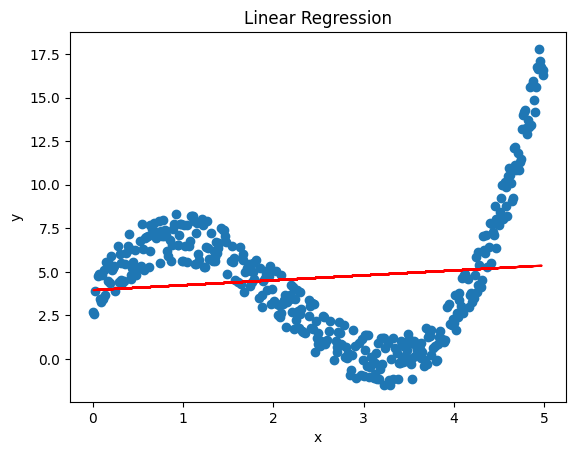

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['x']], data['y'], test_size=0.2)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print('Mean squared error:', mse)

# Plot the data and the fitted line
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

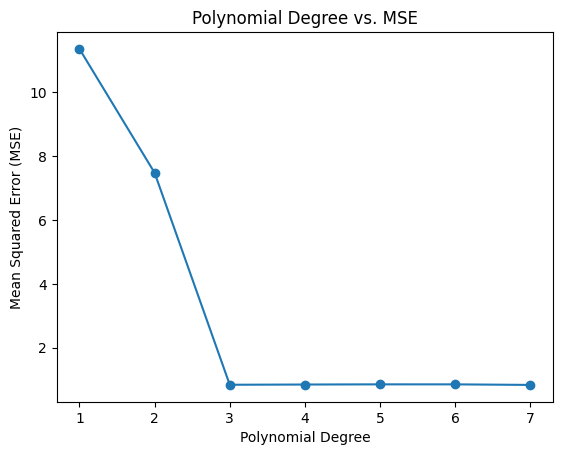

In [27]:
from sklearn.preprocessing import PolynomialFeatures


degrees = range(1, 8)
mse_values = []

for degree in degrees:
    # Polynomial feature transformation
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Make predictions
    y_pred = model.predict(X_poly_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the results
plt.plot(degrees, mse_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Polynomial Degree vs. MSE')
plt.show()


In [28]:
# Choosing Degree 3 because it has least degree with low MSE value
poly_final = PolynomialFeatures(degree=3)

X_poly_final = poly_final.fit_transform(X_train)

model_final = LinearRegression()
model_final.fit(X_poly_final, y_train)


X_poly_test_final = poly_final.transform(X_test)

Y_pred_final = model_final.predict(X_poly_test_final)


Final Model Mean Squared Error: 0.8344256056955875


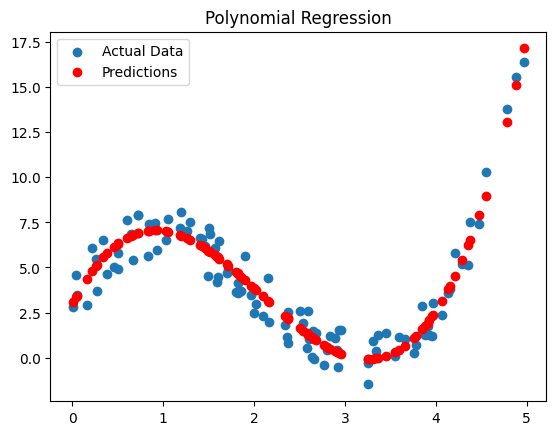

In [29]:
# Final model with degree 3
mse_final = mean_squared_error(y_test, Y_pred_final)
print('Final Model Mean Squared Error: ', mse_final)

plt.scatter(X_test, y_test, label='Original Data')
plt.scatter(X_test, Y_pred_final, color='red', label='Predictions')
plt.title("Polynomial Regression")
plt.legend()
plt.show()


In [3]:
'''2. Predict the model for the given data (use data link 2)''''

uploaded=files.upload()
data_2=pd.read_csv('dataweek2.csv')
data_2.head()


Saving dataweek2.csv to dataweek2.csv


,Unnamed: 0,x,y
0,0,0,1.000000
1,1,1,1.836422
2,2,2,0.114749
3,3,3,-0.988580
4,4,4,-0.915767


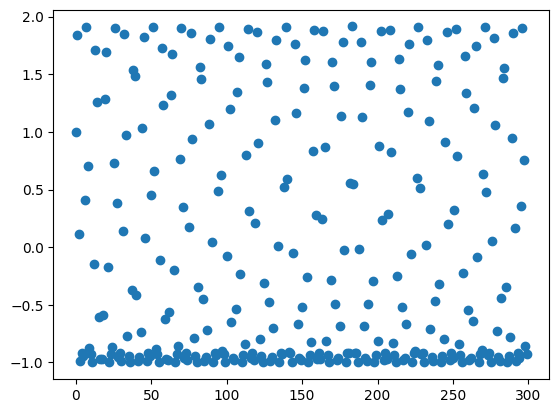

In [4]:
# X_train, X_test, y_train, y_test = train_test_split(data_2[['x']], data_2['y'], test_size=0.2)
# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print('Mean squared error:', mse)

plt.scatter(data_2.x, data_2.y)

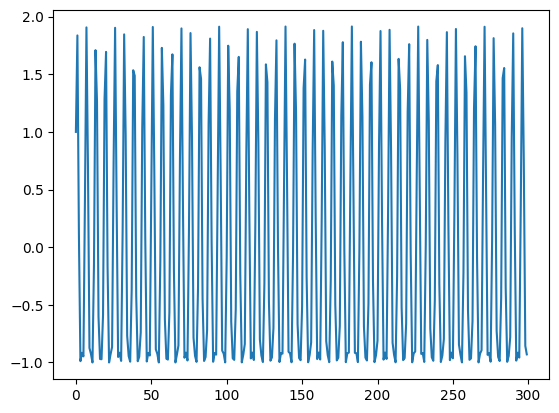

In [5]:
plt.plot(data_2.x, data_2.y)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_2[['x']], data_2['y'], test_size=0.2)

The mean square error : 8.118597186402361e-33


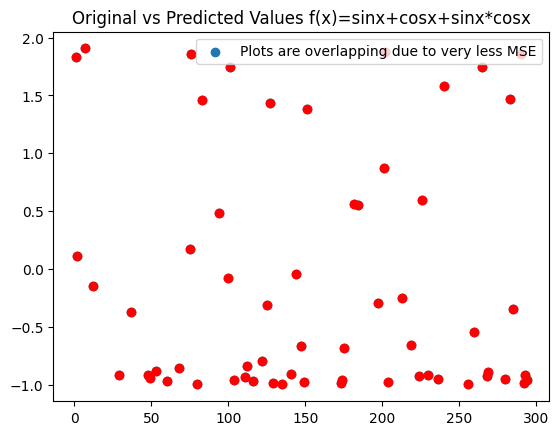

In [72]:
# funtion of sinx, cosx
def f(x,a):
  return a*(np.sin(x) + np.cos(x) + np.sin(x)*np.cos(x))

y_pred=f(X_test,1) # let a=1

# MSE for the model
mse = mean_squared_error(y_test, y_pred)
print('The mean square error :',mse)

plt.scatter(X_test,y_test,label='Plots are overlapping due to very less MSE')
plt.scatter(X_test,y_pred,color='red')
plt.legend()
plt.title('Original vs Predicted Values f(x)=sinx+cosx+sinx*cosx')
plt.show()


The mean square error : 1.0660841790302196


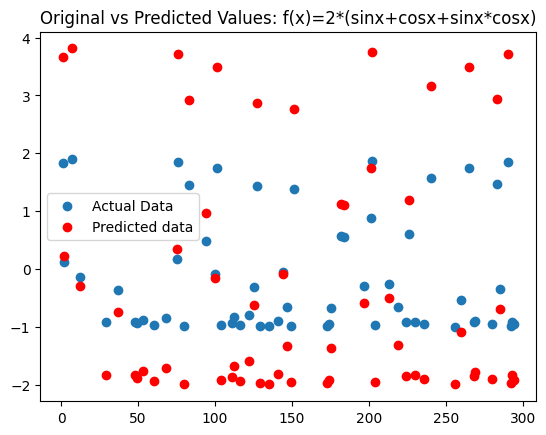

In [71]:
# funtion of sinx, cosx
def f(x,a):
  return a*(np.sin(x) + np.cos(x) + np.sin(x)*np.cos(x))

y_pred=f(X_test,2) # let a=2

# MSE for the model
mse = mean_squared_error(y_test, y_pred)
print('The mean square error :',mse)

plt.scatter(X_test,y_test,label='Actual Data')
plt.scatter(X_test,y_pred,color='red',label='Predicted data')
plt.legend()
plt.title('Original vs Predicted Values: f(x)=2*(sinx+cosx+sinx*cosx)')
plt.show()

In [69]:
'''
3. Solve this competition (use logisitic regression): https://www.kaggle.com/t/6ac9ca8159f64c4eb794206a735a61ca
'''

